In [169]:
import pandas as pd
import numpy as np


In [170]:
data = pd.read_csv("./MadaLine.csv")


In [171]:
X1 = data.iloc[:, 0]
X2 = data.iloc[:, 1]
target = data.iloc[:, 2]
target=np.where(target==0,-1,1).reshape(-1,1)
class1 = data.loc[target == -1, :]
class2 = data.loc[target == 1, :]
X1.shape

(199,)

In [172]:
data.iloc[:, 2]


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
194    1.0
195    1.0
196    1.0
197    1.0
198    1.0
Name: 0.0, Length: 199, dtype: float64

/home/amir/uni/nndl/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


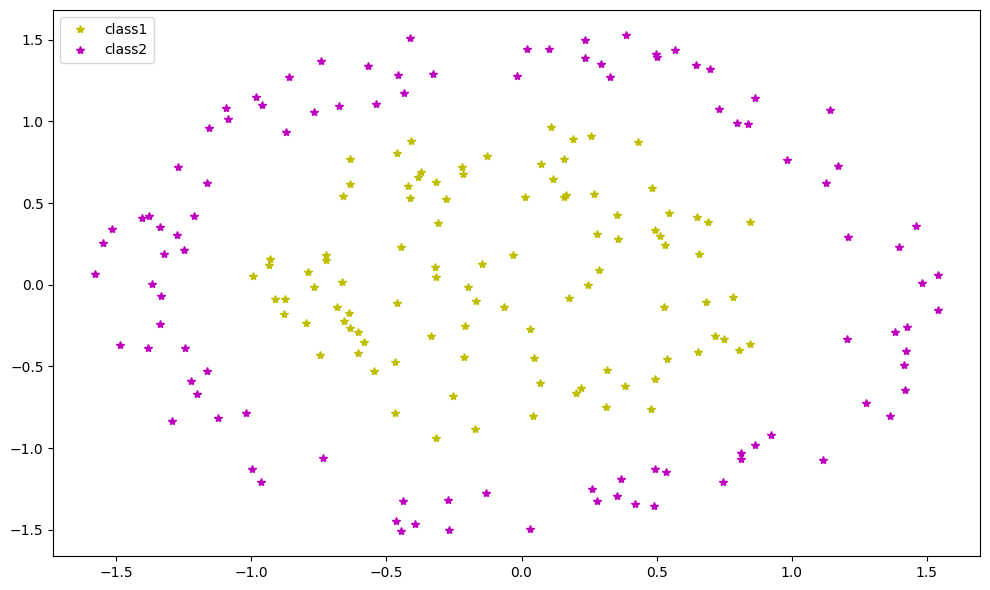

In [173]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot(class1.iloc[:, 0], class1.iloc[:, 1], "y*")
plt.plot(class2.iloc[:, 0], class2.iloc[:, 1], 'm*')
plt.legend(["class1", "class2"], loc="upper left")
plt.show()


In [174]:
xx=np.vstack((X1,X2)).T
xx.shape

(199, 2)

In [175]:
np.random.seed(42)

In [176]:
class mad():
    def __init__(self, learning_rate, n_iter, neuron):
        self.lr = learning_rate
        self.iteration = n_iter
        self.number_of_neuron = neuron

    def update_weight(self, i, k, x):
        self.weight[2, i] = self.weight[2, i] + self.lr*(1-self.z_in[k, i])
        self.weight[:2, i] = self.weight[0:2, i] + self.lr * \
            (1-self.z_in[k, i])*x[k, 0:2]
        return self.weight

    def fit(self, x, target):
        x = self.add_bias(x)

        for epoch in range(self.iteration):

            self.make_z(x)
            self.predict()
            for k in range(xx.shape[0]):

                if target[k] == 1 and self.y[k] != 1:
                    self.weight = self.update_weight(self.indexs[k], k, x)
                if target[k] == -1 and self.y[k] != -1:
                    for i in range(self.z_in.shape[1]):
                        if (self.z_in[k, i] > 0):
                            self.weight = self.update_weight(i, k, x)

    def make_z(self, x):
        self.z_in = np.zeros((x.shape[0], self.number_of_neuron))
        self._initial_weights(x)
        self.z_in = x.dot(self.weight)
        # ues reule for test
        self.z = np.where(self.z_in >= 0.0, 1, -1)


        self.indexs = np.argmin(np.abs(self.z_in), axis=1)

    def add_bias(self, x):
        bias_x = np.ones((x.shape[0], 1))
        x = np.hstack((x, bias_x))
        return x

    def cost(self, y, target):
        e = y-target
        cost = (e**2).sum()/2
        return cost
    
    def accuracy(self, target, y):
        n_zeros = np.count_nonzero((y-target)==0)
        acc=n_zeros/len(y)
        return acc

    def _initial_weights(self, x):
        """ Initialise weights - normal distribution sample with standard dev 0.01 """
        r = 0.08
        random_gen = np.random.RandomState(42)
        vy = random_gen.uniform(-r, r, [1, self.number_of_neuron])
        by = random_gen.uniform(-r, r, [1, 1])
        self.wy = np.hstack((vy, by)).reshape(-1, 1)
        self.weight = random_gen.normal(
            loc=-r, scale=r, size=(x.shape[1], self.number_of_neuron))
        return self

    def predict(self):

        self.z = np.hstack((self.z, np.ones((self.z.shape[0], 1))))
        y_in = self.z.dot(self.wy)
        self.y = np.where(y_in > 0.0, 1, -1)


In [177]:
m=mad(0.05,100,4)
m.fit(xx,target)

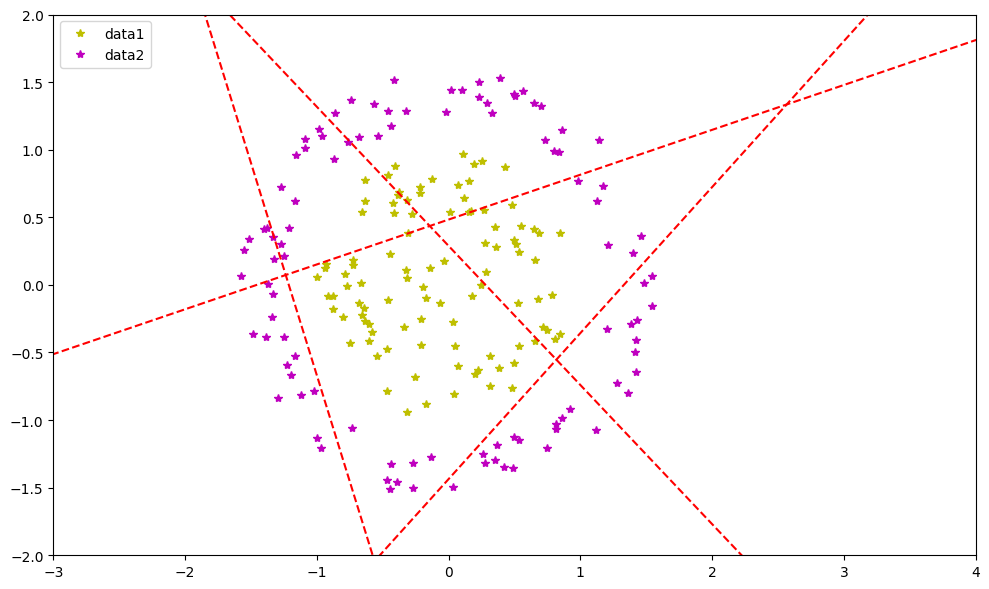

In [178]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot(class1.iloc[:, 0], class1.iloc[:, 1], "y*")
plt.plot(class2.iloc[:, 0], class2.iloc[:, 1], 'm*')
plt.legend(["data1", "data2"], loc="upper left")
x = np.linspace(-5, 5, 100)
plt.xlim(-3, 4)
plt.ylim(-2, 2)
for i in range(m.weight.shape[1]):
    y = - (m.weight[0, i]/m.weight[1, i]) * x - m.weight[2, i]/m.weight[1, i]
    plt.plot(x, y, "--r")
plt.show()
